# SUGARCANE PRODUCTION

In [1]:
# import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [3]:
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [4]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [6]:
df.isnull().sum().mean()

np.float64(0.2857142857142857)

In [7]:
df.dropna(inplace=True)

In [9]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [12]:
del df['S.N0']

In [13]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [14]:
cols = [
    'Production (Tons)',
    'Production per Person (Kg)',
    'Acreage (Hectare)',
    'Yield (Kg / Hectare)'
]

for col in cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('.', '', regex=False)   # remove thousand separators
        .str.replace(',', '.', regex=False)  # fix decimals
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
df.dtypes

Country                        object
Continent                      object
Production (Tons)               int64
Production per Person (Kg)    float64
Acreage (Hectare)               int64
Yield (Kg / Hectare)          float64
dtype: object

In [16]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721.000,4950000,70393.5
2,China,Asia,123059739,88287.000,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219.000,1130820,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394,8.000,9,43596.5
98,Lebanon,Asia,97,16.000,3,28386.4
100,Singapore,Asia,50,9.000,2,25.0
101,Samoa,Oceania,12,6.000,1,11949.8


Outliers in the dataset

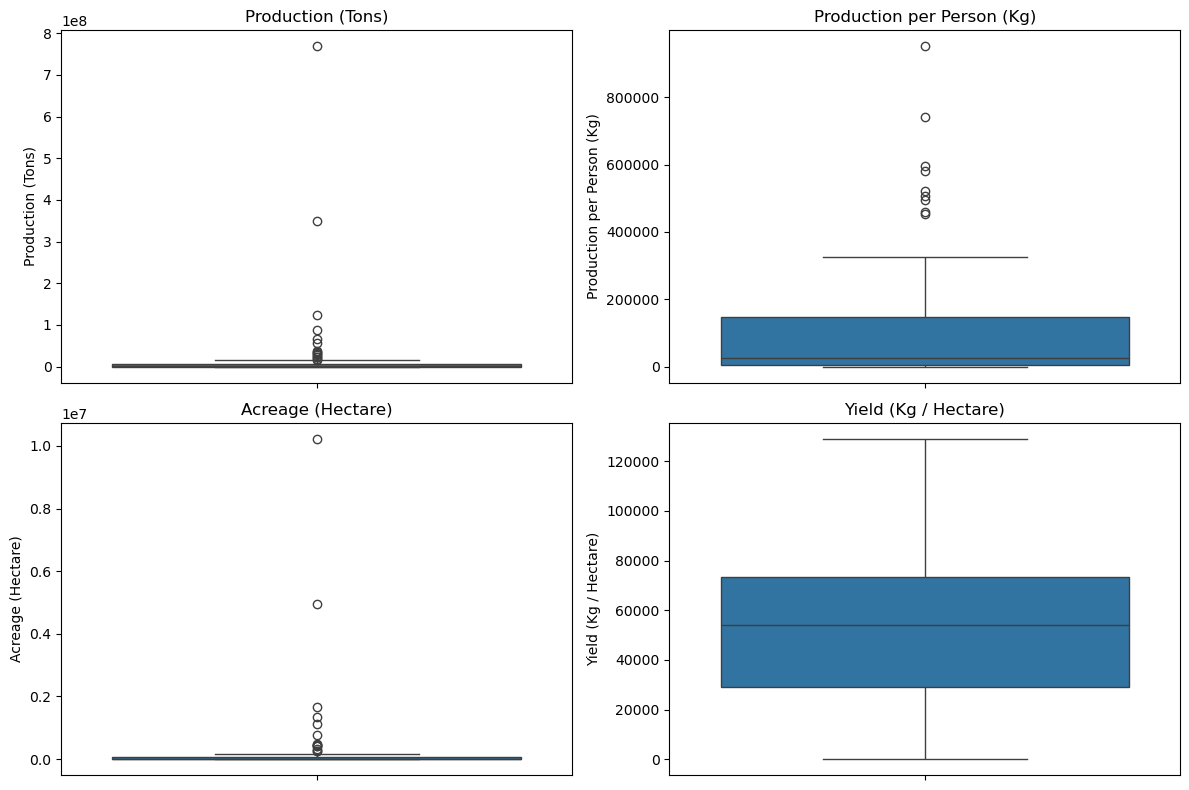

In [17]:
cols = [
    'Production (Tons)',
    'Production per Person (Kg)',
    'Acreage (Hectare)',
    'Yield (Kg / Hectare)'
]

pt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    pt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    pt.title(col)

pt.tight_layout()
pt.show()

In [19]:
df.duplicated().sum()

np.int64(0)